In [62]:
from statsbombpy import sb
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


from tqdm import tqdm



In [16]:
pd.set_option("display.max_columns",None)

Let's see the different competitions for which data is available

In [17]:
competitions = sb.competitions()

/Users/moi/anaconda3/envs/statsbomb_env/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [18]:
competitions


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [19]:
competitions["competition_name"].unique()

array(['1. Bundesliga', 'African Cup of Nations', 'Champions League',
       'Copa America', 'Copa del Rey', "FA Women's Super League",
       'FIFA U20 World Cup', 'FIFA World Cup', 'Indian Super league',
       'La Liga', 'Liga Profesional', 'Ligue 1', 'Major League Soccer',
       'North American League', 'NWSL', 'Premier League', 'Serie A',
       'UEFA Euro', 'UEFA Europa League', "UEFA Women's Euro",
       "Women's World Cup"], dtype=object)

We will select a competition from the regular season (clubs instead of selections) .

In [20]:
top_competitions_name = ['1. Bundesliga',
                    'Champions League',
                    'La Liga',
                    'Ligue 1',
                    'Premier League',
                    'UEFA Europa League',
                    'Serie A']

In [21]:
top_competitions = competitions.loc[competitions["competition_name"].isin(top_competitions_name)]
top_competitions.head(5)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
5,16,2,Europe,Champions League,male,False,False,2016/2017,2024-02-13T02:37:32.205154,2021-06-13T16:17:31.694,None,2024-02-13T02:37:32.205154


In [69]:
#Number of different competitions and seasons
print("The number of distinct competiions x seasons is : ",top_competitions[["competition_id","season_id"]].values.shape[0])

The number of distinct competiions x seasons is :  46


In [ ]:
dict_nb_matches = dict(competition_name = [],season_name = [],nb_matches = [])
for competition_id,season_id in zip(top_competitions["competition_id"].values,top_competitions["season_id"].values):
    nb_matches = sb.matches(competition_id,season_id).shape[0]
    row = top_competitions.loc[(top_competitions["competition_id"]==competition_id)&(top_competitions["season_id"]==season_id)]
    competition_name = row["competition_name"].values
    season_name = row["season_name"].values
    #print(f"{nb_matches} matches available for the competition {competition_name} and the season {season_name}")
    dict_nb_matches["competition_name"].append(competition_name)
    dict_nb_matches["season_name"].append(season_name)
    dict_nb_matches["nb_matches"].append(nb_matches)

/Users/moi/anaconda3/envs/statsbomb_env/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/moi/anaconda3/envs/statsbomb_env/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/moi/anaconda3/envs/statsbomb_env/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/moi/anaconda3/envs/statsbomb_env/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/moi/anaconda3/envs/statsbomb_env/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/moi/anaconda3/envs/statsbomb_env/lib/python3.13/site-packages/statsbombpy

,competition_name,season_name,nb_matches
0,[1. Bundesliga],[2023/2024],34
1,[1. Bundesliga],[2015/2016],306
2,[Champions League],[2018/2019],1
3,[Champions League],[2017/2018],1
4,[Champions League],[2016/2017],1
5,[Champions League],[2015/2016],1
6,[Champions League],[2014/2015],1
7,[Champions League],[2013/2014],1
8,[Champions League],[2012/2013],1
9,[Champions League],[2011/2012],1


In [73]:
pd.DataFrame(dict_nb_matches).sort_values(by="nb_matches",ascending=False).head((10))

,competition_name,season_name,nb_matches
43,[Serie A],[2015/2016],380
25,[La Liga],[2015/2016],380
41,[Premier League],[2015/2016],380
40,[Ligue 1],[2015/2016],377
1,[1. Bundesliga],[2015/2016],306
42,[Premier League],[2003/2004],38
26,[La Liga],[2014/2015],38
29,[La Liga],[2011/2012],37
23,[La Liga],[2017/2018],36
20,[La Liga],[2020/2021],35


We will consider La Liga for the 2015/2016 season as all the matches are available for this competition in this season

In [24]:
competition_id_la_liga = int(top_competitions.loc[top_competitions["competition_name"]=="La Liga"]["competition_id"].unique())
season_id_1516 = int(top_competitions.loc[top_competitions["season_name"]=="2015/2016"]["season_id"].unique())

laliga_1516_ids = dict(
    competition_id=competition_id_la_liga,
    season_id=season_id_1516
)

/var/folders/fq/dw8w2ts50kl6ny_mzcr883qh0000gn/T/ipykernel_14899/1489927214.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  competition_id_la_liga = int(top_competitions.loc[top_competitions["competition_name"]=="La Liga"]["competition_id"].unique())
/var/folders/fq/dw8w2ts50kl6ny_mzcr883qh0000gn/T/ipykernel_14899/1489927214.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  season_id_1516 = int(top_competitions.loc[top_competitions["season_name"]=="2015/2016"]["season_id"].unique())


In [ ]:
#Matches for La Liga 2015/2016
matches = sb.matches(competition_id=competition_id_la_liga,
                     season_id=season_id_1516)
print(matches.shape)
matches.tail(5)

(380, 22)


/Users/moi/anaconda3/envs/statsbomb_env/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
375,266467,2015-09-23,20:00:00.000,Spain - La Liga,2015/2016,Celta Vigo,Barcelona,4,1,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,5,Regular Season,Abanca-Balaídos,Alberto Undiano Mallenco,Manuel Eduardo Berizzo,Luis Enrique Martínez García,1.1.0,2,2
376,267273,2016-02-20,17:00:00.000,Spain - La Liga,2015/2016,Las Palmas,Barcelona,1,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,25,Regular Season,Estadio de Gran Canaria,NaN,Enrique Setién Solar,Luis Enrique Martínez García,1.1.0,2,2
377,266490,2015-09-20,20:30:00.000,Spain - La Liga,2015/2016,Barcelona,Levante UD,4,1,available,scheduled,2022-08-30T10:30:18.594970,2021-06-13T16:17:31.694,4,Regular Season,Spotify Camp Nou,David Fernández Borbalan,Luis Enrique Martínez García,Luis Lucas Alcaraz González,1.1.0,2,2
378,266254,2016-02-14,21:30:00.000,Spain - La Liga,2015/2016,Barcelona,Celta Vigo,6,1,available,scheduled,2023-07-24T17:56:08.111843,2021-06-13T16:17:31.694,24,Regular Season,Spotify Camp Nou,NaN,Luis Enrique Martínez García,Manuel Eduardo Berizzo,1.1.0,2,2
379,266557,2016-04-17,20:30:00.000,Spain - La Liga,2015/2016,Barcelona,Valencia,1,2,available,scheduled,2023-07-24T18:00:30.746407,2021-06-13T16:17:31.694,33,Regular Season,Spotify Camp Nou,David Fernández Borbalan,Luis Enrique Martínez García,Francisco Martín Ayestarán Barandiarán,1.1.0,2,2


In [75]:
match_ids = list(matches["match_id"].values)

In [ ]:
#Concatenating all events of all matches of all teams for this season
all_events_list = list()

for match_id in tqdm(match_ids):
    events = sb.events(match_id=match_id,flatten_attrs=True)
    events["match_id"] = match_id
    all_events_list.append(events)

all_events = pd.concat(all_events_list,ignore_index=True)


  0%|          | 0/380 [00:00<?, ?it/s]/Users/moi/anaconda3/envs/statsbomb_env/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  0%|          | 1/380 [00:00<03:05,  2.04it/s]/Users/moi/anaconda3/envs/statsbomb_env/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  1%|          | 2/380 [00:01<04:14,  1.48it/s]/Users/moi/anaconda3/envs/statsbomb_env/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  1%|          | 3/380 [00:02<05:34,  1.13it/s]/Users/moi/anaconda3/envs/statsbomb_env/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  1%|          | 4/380 [00:03<05:41,  1.10it/s]/Users/moi/anaconda3/envs/statsbomb_e

In [ ]:
#Type of each event in the data
all_events["type"].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Duel', 'Interception', 'Goal Keeper',
       'Clearance', 'Ball Recovery', 'Shot', 'Foul Committed', 'Foul Won',
       'Dribbled Past', 'Dribble', 'Block', 'Dispossessed',
       'Injury Stoppage', 'Player Off', 'Player On', 'Substitution',
       'Half End', 'Tactical Shift', 'Bad Behaviour', 'Shield', '50/50',
       'Offside', 'Referee Ball-Drop', 'Error', 'Own Goal For',
       'Own Goal Against'], dtype=object)

In [ ]:
# Filter key event types
passes = all_events[all_events['type'] == 'Pass']
shots = all_events[all_events['type'] == 'Shot']
pressures = all_events[all_events['type'] == 'Pressure']
recoveries = all_events[all_events['type'] == 'Ball Recovery']


In [31]:
group_keys = ['team', 'match_id']

# Pass-related stats
team_stats = passes.groupby(group_keys).agg({
    'pass_outcome': lambda x: x.isna().mean(),  # pass completion rate
    'pass_length': 'mean',
    'pass_angle': 'mean'
}).rename(columns={
    'pass_outcome': 'pass_completion_rate',
    'pass_length': 'avg_pass_length',
    'pass_angle': 'avg_pass_angle'
})

# More pass stats
team_stats['total_passes'] = passes.groupby(group_keys).size()
team_stats['long_pass_ratio'] = passes.groupby(group_keys)['pass_length'].apply(lambda x: (x > 30).mean())
team_stats['forward_pass_ratio'] = passes.groupby(group_keys)['pass_angle'].apply(lambda x: (x < 0.5).mean())

# Other actions
team_stats['total_shots'] = shots.groupby(group_keys).size()
team_stats['pressures'] = pressures.groupby(group_keys).size()
team_stats['recoveries'] = recoveries.groupby(group_keys).size()

team_stats = team_stats.fillna(0).reset_index()


In [ ]:
#Computing profile of each team by averaging the stats on the season
team_profiles = team_stats.groupby('team').mean()
team_profiles = team_profiles.drop(columns=['match_id'])


In [33]:
team_profiles

,pass_completion_rate,avg_pass_length,avg_pass_angle,total_passes,long_pass_ratio,forward_pass_ratio,total_shots,pressures,recoveries
team,,,,,,,,,
Athletic Club,0.726558,22.717674,-0.015190,481.789474,0.237973,0.646015,12.236842,164.289474,53.868421
Atlético Madrid,0.756057,20.048248,-0.001337,505.500000,0.188408,0.637958,12.710526,165.789474,53.605263
Barcelona,0.858792,19.561238,0.016316,676.500000,0.161394,0.589860,15.894737,122.605263,48.500000
Celta Vigo,0.775964,22.082393,0.001047,542.394737,0.207065,0.629074,11.736842,154.631579,53.447368
Eibar,0.666350,24.037136,-0.011935,425.842105,0.276556,0.662927,11.157895,164.394737,54.368421
Espanyol,0.721735,22.736503,0.022201,424.421053,0.244268,0.635536,10.500000,155.447368,47.736842
Getafe,0.732463,22.770904,-0.001556,423.157895,0.239859,0.637949,11.473684,162.684211,51.394737
Granada,0.715957,23.759640,-0.036560,399.210526,0.264225,0.661140,11.421053,151.236842,48.552632
Las Palmas,0.795821,20.925431,-0.005394,554.657895,0.190020,0.619633,11.131579,137.184211,51.421053


In [ ]:
#Perform clustering on the team profiles
features = [
    'pass_completion_rate',
    'avg_pass_length',
    'forward_pass_ratio',
    'long_pass_ratio',
    'total_passes',
    'total_shots',
    'pressures',
    'recoveries'
]

#Scale the data as each feature is in different scales
scaler = StandardScaler()
X = scaler.fit_transform(team_profiles[features])

#We try it with 4 clusters, reflecting 4 "styles of play"
kmeans = KMeans(n_clusters=4, random_state=42)
team_profiles['cluster'] = kmeans.fit_predict(X)


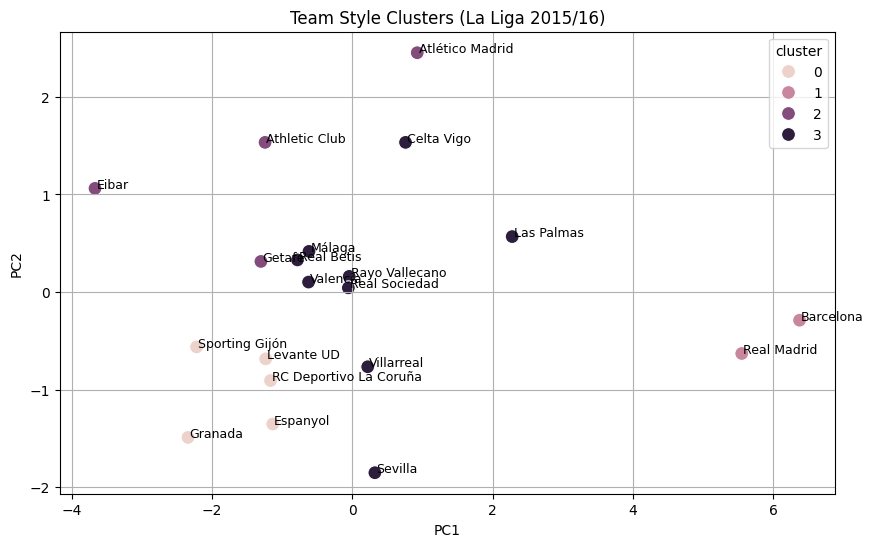

In [ ]:
#Dimensionality reduction in order to plot the clusters in 2 dimensions.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

team_profiles['pc1'] = X_pca[:, 0]
team_profiles['pc2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=team_profiles, x='pc1', y='pc2', hue='cluster', s=100)
for i in range(len(team_profiles)):
    plt.text(team_profiles['pc1'].iloc[i]+0.02, team_profiles['pc2'].iloc[i], 
             team_profiles.index[i], fontsize=9)
plt.title('Team Style Clusters (La Liga 2015/16)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


In [36]:
summary = team_profiles.groupby('cluster')[features].mean().round(2)
display(summary)


,pass_completion_rate,avg_pass_length,forward_pass_ratio,long_pass_ratio,total_passes,total_shots,pressures,recoveries
cluster,,,,,,,,
0,0.72,23.37,0.64,0.25,425.71,11.12,151.55,49.42
1,0.85,19.90,0.59,0.17,644.55,17.38,127.30,48.24
2,0.72,22.39,0.65,0.24,459.07,11.89,164.29,53.31
3,0.75,22.04,0.63,0.22,484.32,11.48,148.07,50.75


Following these results, let's complement the analysis by adding other insightful features

In [ ]:
#Add ball carrying metrics


# Filter carry events
carries = all_events[all_events['type'] == 'Carry'].copy()

# Drop rows with missing locations
carries = carries.dropna(subset=['location', 'carry_end_location'])

# Calculate carry distance
carries['carry_distance'] = carries.apply(
    lambda row: np.linalg.norm(np.array(row['carry_end_location']) - np.array(row['location'])), axis=1
)

# Calculate carry ΔX (field is 120m long, X goes left-to-right)
carries['carry_dx'] = carries.apply(
    lambda row: row['carry_end_location'][0] - row['location'][0], axis=1
)

# Progressive carry: forward >10 meters
carries['progressive'] = carries['carry_dx'] > 10

# Aggregate carry stats per team per match
carry_stats = carries.groupby(['team', 'match_id']).agg(
    total_carries=('id', 'count'),
    total_carry_distance=('carry_distance', 'sum'),
    avg_carry_length=('carry_distance', 'mean'),
    progressive_carries=('progressive', 'sum'),
    progressive_carry_ratio=('progressive', 'mean')
).reset_index()


In [ ]:
#Adding defensive statistics

interceptions = all_events[all_events['type'] == 'Interception']
tackles = all_events[all_events['type'] == 'Tackle']
blocks = all_events[all_events['type'] == 'Block']
clearances = all_events[all_events['type'] == 'Clearance']

defensive_stats = interceptions.groupby(['team', 'match_id']).size().reset_index(name='interceptions')
defensive_stats = defensive_stats.merge(
    tackles.groupby(['team', 'match_id']).size().reset_index(name='tackles'),
    on=['team', 'match_id'], how='outer'
)
defensive_stats = defensive_stats.merge(
    blocks.groupby(['team', 'match_id']).size().reset_index(name='blocks'),
    on=['team', 'match_id'], how='outer'
)
defensive_stats = defensive_stats.merge(
    clearances.groupby(['team', 'match_id']).size().reset_index(name='clearances'),
    on=['team', 'match_id'], how='outer'
)


In [ ]:
#Adding the mean recovery height to the recoveries analysis, reflecting pressing teams.

recoveries = all_events[all_events['type'] == 'Ball Recovery'].copy()
recoveries = recoveries.dropna(subset=['location'])

# Define own goal coordinates
own_goal_x = 0
own_goal_y = 40

# Compute Euclidean distance to own goal
recoveries['recovery_distance_to_own_goal'] = recoveries['location'].apply(
    lambda loc: np.sqrt((loc[0] - own_goal_x)**2 + (loc[1] - own_goal_y)**2)
)

# Average recovery distance per team per match
recovery_dist_stats = recoveries.groupby(['team', 'match_id']).agg(
    mean_recovery_distance=('recovery_distance_to_own_goal', 'mean'),
    total_recoveries=('id', 'count')
).reset_index()


In [ ]:
#Adding goalkeeper statistics

gk_actions = all_events[all_events['type'] == 'Goal Keeper']
gk_stats = gk_actions.groupby(['team', 'match_id']).agg(
    saves=('goalkeeper_type', lambda x: (x == 'Save').sum()),
    punches=('goalkeeper_type', lambda x: (x == 'Punch').sum()),
    claims=('goalkeeper_type', lambda x: (x == 'Claim').sum()),
    smothers=('goalkeeper_type', lambda x: (x == 'Smother').sum())
).reset_index()


In [ ]:
#Adding fouls statistics

fouls = all_events[all_events['type'] == 'Foul Committed']
fouls_won = all_events[all_events['type'] == 'Foul Won']
cards = all_events[all_events['type'] == 'Bad Behaviour']

foul_stats = fouls.groupby(['team', 'match_id']).size().reset_index(name='fouls_committed')
foul_stats = foul_stats.merge(
    fouls_won.groupby(['team', 'match_id']).size().reset_index(name='fouls_won'),
    on=['team', 'match_id'], how='outer'
)



In [ ]:
#Adding dribbling statistics

dribbles = all_events[all_events['type'] == 'Dribble']

dribble_stats = dribbles.groupby(['team', 'match_id']).agg(
    dribbles_attempted=('id', 'count'),
    dribbles_completed=('dribble_outcome', lambda x: (x == 'Complete').sum())
).reset_index()

dribble_stats['dribble_success_rate'] = dribble_stats['dribbles_completed'] / dribble_stats['dribbles_attempted']


In [ ]:
#Merging all the different statistics into one dataframe

from functools import reduce

dfs_to_merge = [team_stats, carry_stats, defensive_stats, recovery_dist_stats, gk_stats, foul_stats, dribble_stats]
full_team_stats = reduce(
    lambda left, right: pd.merge(left, right, on=['team', 'match_id'], how='outer'),
    dfs_to_merge
).fillna(0)


In [51]:
# Drop match_id since we’re aggregating over the season
team_profiles = full_team_stats.drop(columns=['match_id'])

# Group by team and compute mean per feature
team_profiles = team_profiles.groupby('team').mean().reset_index()


In [54]:
team_profiles

,team,pass_completion_rate,avg_pass_length,avg_pass_angle,total_passes,long_pass_ratio,forward_pass_ratio,total_shots,pressures,recoveries,total_carries,total_carry_distance,avg_carry_length,progressive_carries,progressive_carry_ratio,interceptions,tackles,blocks,clearances,mean_recovery_distance,total_recoveries,saves,punches,claims,smothers,fouls_committed,fouls_won,dribbles_attempted,dribbles_completed,dribble_success_rate
0,Athletic Club,0.726558,22.717674,-0.015190,481.789474,0.237973,0.646015,12.236842,164.289474,53.868421,345.578947,1958.538653,5.739707,37.815789,0.112589,17.421053,0.0,19.894737,18.973684,60.464577,53.868421,0.000000,0.447368,0.0,0.026316,15.236842,14.763158,17.236842,8.394737,0.497390
1,Atlético Madrid,0.756057,20.048248,-0.001337,505.500000,0.188408,0.637958,12.710526,165.789474,53.605263,381.447368,2115.681908,5.588158,39.473684,0.104663,17.263158,0.0,20.026316,21.157895,61.023468,53.605263,0.052632,0.447368,0.0,0.000000,15.526316,13.973684,21.868421,12.289474,0.567234
2,Barcelona,0.858792,19.561238,0.016316,676.500000,0.161394,0.589860,15.894737,122.605263,48.500000,570.368421,3140.325859,5.531550,57.500000,0.101965,9.105263,0.0,15.473684,18.131579,61.163266,48.500000,0.000000,0.315789,0.0,0.000000,11.210526,18.263158,26.710526,16.500000,0.612974
3,Celta Vigo,0.775964,22.082393,0.001047,542.394737,0.207065,0.629074,11.736842,154.631579,53.447368,423.578947,2346.536265,5.574427,39.710526,0.095139,18.289474,0.0,18.052632,22.657895,56.712745,53.447368,0.026316,0.631579,0.0,0.000000,16.210526,16.578947,20.736842,11.157895,0.539331
4,Eibar,0.666350,24.037136,-0.011935,425.842105,0.276556,0.662927,11.157895,164.394737,54.368421,285.342105,1708.530029,5.989473,31.605263,0.109736,16.552632,0.0,18.657895,21.210526,58.443863,54.368421,0.026316,0.684211,0.0,0.105263,18.894737,12.105263,15.447368,8.157895,0.545511
5,Espanyol,0.721735,22.736503,0.022201,424.421053,0.244268,0.635536,10.500000,155.447368,47.736842,317.631579,1883.767336,5.988957,36.315789,0.116212,16.105263,0.0,18.184211,22.736842,56.098681,47.736842,0.000000,0.657895,0.0,0.026316,20.131579,14.657895,19.815789,11.263158,0.573330
6,Getafe,0.732463,22.770904,-0.001556,423.157895,0.239859,0.637949,11.473684,162.684211,51.394737,322.868421,2003.430770,6.234351,39.263158,0.122182,17.947368,0.0,17.184211,19.315789,56.917508,51.394737,0.026316,1.078947,0.0,0.026316,17.210526,13.921053,19.736842,10.289474,0.523788
7,Granada,0.715957,23.759640,-0.036560,399.210526,0.264225,0.661140,11.421053,151.236842,48.552632,293.315789,1747.441255,6.017263,33.368421,0.114742,15.342105,0.0,18.842105,23.789474,55.900090,48.552632,0.000000,0.973684,0.0,0.052632,17.947368,15.210526,18.210526,10.394737,0.567755
8,Las Palmas,0.795821,20.925431,-0.005394,554.657895,0.190020,0.619633,11.131579,137.184211,51.421053,443.026316,2586.889682,5.858794,46.078947,0.104958,16.131579,0.0,17.000000,22.526316,52.953844,51.421053,0.026316,0.842105,0.0,0.052632,14.289474,17.500000,20.631579,11.657895,0.563830
9,Levante UD,0.722869,23.177710,0.005034,428.815789,0.250502,0.644506,11.657895,142.000000,50.842105,310.473684,1911.419508,6.171089,38.473684,0.123784,16.052632,0.0,17.157895,24.789474,56.454180,50.842105,0.052632,0.815789,0.0,0.000000,16.842105,13.973684,18.973684,10.657895,0.568867


In [ ]:
#filter claims and tackles as there are always zero

team_profiles = team_profiles.drop(columns=["tackles","claims"])

In [ ]:
# Inspecting for the three biggest teams of the season

team_profiles.loc[team_profiles["team"].isin(["Barcelona","Atlético Madrid","Real Madrid"])]

,team,pass_completion_rate,avg_pass_length,avg_pass_angle,total_passes,long_pass_ratio,forward_pass_ratio,total_shots,pressures,recoveries,total_carries,total_carry_distance,avg_carry_length,progressive_carries,progressive_carry_ratio,interceptions,blocks,clearances,mean_recovery_distance,total_recoveries,saves,punches,smothers,fouls_committed,fouls_won,dribbles_attempted,dribbles_completed,dribble_success_rate
1,Atlético Madrid,0.756057,20.048248,-0.001337,505.500000,0.188408,0.637958,12.710526,165.789474,53.605263,381.447368,2115.681908,5.588158,39.473684,0.104663,17.263158,20.026316,21.157895,61.023468,53.605263,0.052632,0.447368,0.000000,15.526316,13.973684,21.868421,12.289474,0.567234
2,Barcelona,0.858792,19.561238,0.016316,676.500000,0.161394,0.589860,15.894737,122.605263,48.500000,570.368421,3140.325859,5.531550,57.500000,0.101965,9.105263,15.473684,18.131579,61.163266,48.500000,0.000000,0.315789,0.000000,11.210526,18.263158,26.710526,16.500000,0.612974
14,Real Madrid,0.843678,20.242613,0.006185,612.605263,0.180253,0.595209,18.868421,132.000000,47.973684,494.710526,2741.800170,5.610677,46.815789,0.096820,16.842105,16.500000,15.052632,58.928187,47.973684,0.026316,0.526316,0.078947,13.078947,16.605263,21.394737,13.105263,0.618405


In [57]:
# Save team names for later
team_names = team_profiles['team']
features = team_profiles.drop(columns='team')

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [58]:
# You can choose n_clusters manually (e.g., 4), or test with silhouette scores
kmeans = KMeans(n_clusters=4, random_state=42)
team_profiles['cluster'] = kmeans.fit_predict(X_scaled)


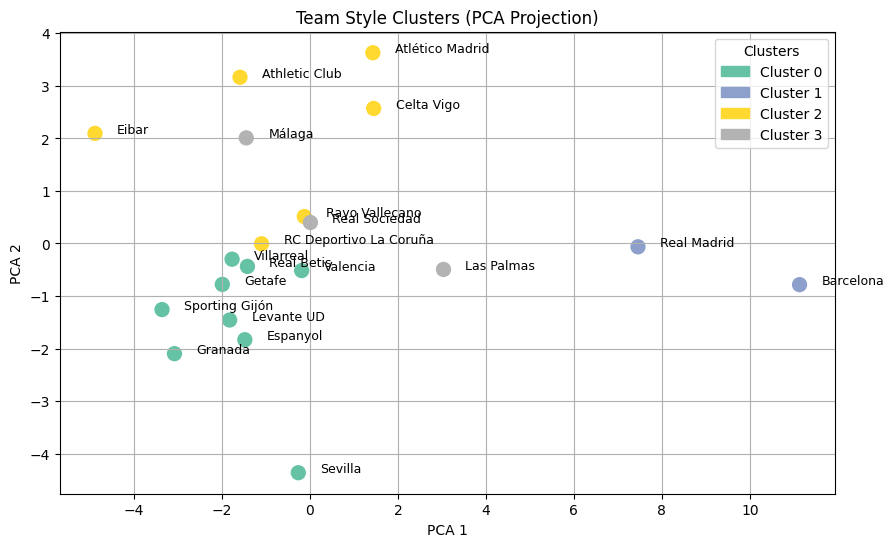

In [63]:
# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot with legend
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=team_profiles['cluster'],
    cmap='Set2',
    s=100
)

# Annotate teams
for i, name in enumerate(team_names):
    plt.text(X_pca[i, 0]+0.5, X_pca[i, 1], name, fontsize=9)

# Create custom legend
unique_clusters = sorted(team_profiles['cluster'].unique())
legend_handles = [
    mpatches.Patch(color=scatter.cmap(scatter.norm(cluster)), label=f'Cluster {cluster}')
    for cluster in unique_clusters
]
plt.legend(handles=legend_handles, title='Clusters', loc='best')

plt.title("Team Style Clusters (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()



In [65]:
team_profiles

,team,pass_completion_rate,avg_pass_length,avg_pass_angle,total_passes,long_pass_ratio,forward_pass_ratio,total_shots,pressures,recoveries,total_carries,total_carry_distance,avg_carry_length,progressive_carries,progressive_carry_ratio,interceptions,blocks,clearances,mean_recovery_distance,total_recoveries,saves,punches,smothers,fouls_committed,fouls_won,dribbles_attempted,dribbles_completed,dribble_success_rate,cluster
0,Athletic Club,0.726558,22.717674,-0.015190,481.789474,0.237973,0.646015,12.236842,164.289474,53.868421,345.578947,1958.538653,5.739707,37.815789,0.112589,17.421053,19.894737,18.973684,60.464577,53.868421,0.000000,0.447368,0.026316,15.236842,14.763158,17.236842,8.394737,0.497390,2
1,Atlético Madrid,0.756057,20.048248,-0.001337,505.500000,0.188408,0.637958,12.710526,165.789474,53.605263,381.447368,2115.681908,5.588158,39.473684,0.104663,17.263158,20.026316,21.157895,61.023468,53.605263,0.052632,0.447368,0.000000,15.526316,13.973684,21.868421,12.289474,0.567234,2
2,Barcelona,0.858792,19.561238,0.016316,676.500000,0.161394,0.589860,15.894737,122.605263,48.500000,570.368421,3140.325859,5.531550,57.500000,0.101965,9.105263,15.473684,18.131579,61.163266,48.500000,0.000000,0.315789,0.000000,11.210526,18.263158,26.710526,16.500000,0.612974,1
3,Celta Vigo,0.775964,22.082393,0.001047,542.394737,0.207065,0.629074,11.736842,154.631579,53.447368,423.578947,2346.536265,5.574427,39.710526,0.095139,18.289474,18.052632,22.657895,56.712745,53.447368,0.026316,0.631579,0.000000,16.210526,16.578947,20.736842,11.157895,0.539331,2
4,Eibar,0.666350,24.037136,-0.011935,425.842105,0.276556,0.662927,11.157895,164.394737,54.368421,285.342105,1708.530029,5.989473,31.605263,0.109736,16.552632,18.657895,21.210526,58.443863,54.368421,0.026316,0.684211,0.105263,18.894737,12.105263,15.447368,8.157895,0.545511,2
5,Espanyol,0.721735,22.736503,0.022201,424.421053,0.244268,0.635536,10.500000,155.447368,47.736842,317.631579,1883.767336,5.988957,36.315789,0.116212,16.105263,18.184211,22.736842,56.098681,47.736842,0.000000,0.657895,0.026316,20.131579,14.657895,19.815789,11.263158,0.573330,0
6,Getafe,0.732463,22.770904,-0.001556,423.157895,0.239859,0.637949,11.473684,162.684211,51.394737,322.868421,2003.430770,6.234351,39.263158,0.122182,17.947368,17.184211,19.315789,56.917508,51.394737,0.026316,1.078947,0.026316,17.210526,13.921053,19.736842,10.289474,0.523788,0
7,Granada,0.715957,23.759640,-0.036560,399.210526,0.264225,0.661140,11.421053,151.236842,48.552632,293.315789,1747.441255,6.017263,33.368421,0.114742,15.342105,18.842105,23.789474,55.900090,48.552632,0.000000,0.973684,0.052632,17.947368,15.210526,18.210526,10.394737,0.567755,0
8,Las Palmas,0.795821,20.925431,-0.005394,554.657895,0.190020,0.619633,11.131579,137.184211,51.421053,443.026316,2586.889682,5.858794,46.078947,0.104958,16.131579,17.000000,22.526316,52.953844,51.421053,0.026316,0.842105,0.052632,14.289474,17.500000,20.631579,11.657895,0.563830,3
9,Levante UD,0.722869,23.177710,0.005034,428.815789,0.250502,0.644506,11.657895,142.000000,50.842105,310.473684,1911.419508,6.171089,38.473684,0.123784,16.052632,17.157895,24.789474,56.454180,50.842105,0.052632,0.815789,0.000000,16.842105,13.973684,18.973684,10.657895,0.568867,0


In [67]:
# Average feature values per cluster
cluster_profiles = team_profiles.drop(columns="team").groupby('cluster').mean()
cluster_profiles.transpose().round(2)


cluster,0,1,2,3
pass_completion_rate,0.73,0.85,0.73,0.75
avg_pass_length,22.71,19.90,22.51,21.76
avg_pass_angle,-0.00,0.01,-0.01,0.02
total_passes,435.16,644.55,486.21,496.66
long_pass_ratio,0.24,0.17,0.23,0.22
forward_pass_ratio,0.64,0.59,0.64,0.63
total_shots,10.89,17.38,12.18,11.80
pressures,152.13,127.30,158.48,142.50
recoveries,49.52,48.24,52.71,51.69
total_carries,324.92,532.54,357.84,377.07


We can identify 3/4 styles of play:
- cluster 0 and cluster 2 : Defensive playstyles, either by pressing or with a low defensive block. Long and forward passes, the least precise, with the highest number of recoveries, pressures and fouls.
- cluster 1 : possession teams, tiki-taka tactics, with only Barcelona and Real Madrid in the cluster and with Barcelona further than the other clusters (we can interpret it with Barcelona being the most "tiki-taka" playing style team, and Real Madrid playing this style in several matches but also different playstyles)
- cluster 3 : Adaptative playstyle. This cluster is almost never the least or the most in the different aspects of the game.

One could perform further analyses by computing standard deviation of the different statistics in addition to the mean, in order to reflect the tactical variability.
This could be used for a quick team review before a match. We could also compute similar statistics for players instead of teams, and use it to better know individual player styles, or identify players with a particular play style either before recruiting or having an opposition against.
